# Случайное блуждание. PageRank

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. 'Лекция 5: Случайные блуждания на графах'
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://numpy.org/doc/stable/reference/generated/numpy.diag.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_power.html
    * https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
    * https://networkx.org/documentation/stable/reference/algorithms/centrality.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

## Вопросы для совместного обсуждения

1\. Обсудите понятие случайного блуждания на графах. 

 __Случайное блуждение__ (random walk) - случайный процесс перехода между состояниями (в нашем случае - узлами сети / вершинами графа) определяемый __матрицей перехода__ $\mathbf{P}$ ( $\mathbf{P}$ - row stochastic matrix), в которой фиксируется вероятность случайного перехода $p_{ij}$ из узла $n_i$ в узел $n_j$. Для корректности вероятностного определения должны выполняться следующие требования:

$0 \le p_{ij} \le 1$

$\sum_j p_{ij}=1$

Случайное блуждание можно моделировать двумя способами:

1. Реальные переходы по узлам – мы перемещается по вершинам графа, выбирая на каждом шаге следующее ребро случайно (равновероятно или согласно весам).
2. Работа с вероятностными распределениями – вместо реальных переходов рассматриваем распределение вероятностей нахождения в каждой вершине. Изначально вероятность сосредоточена в одной вершине (начальной вершине), а затем обновляется с помощью матрицы переходов: $\mathbf{p}^{t+1}=\mathbf{P}^{\top} \mathbf{p}^t$  

Если граф невзвешенный и ориентированный, то агент переходит в одну из соседних вершин с равной вероятностью. Если взвешенный — вероятность перехода зависит от весов рёбер.

Выполнение реальных переходов по узлам реализуется достаточно просто. Главное: определиться, работаете с весами или нет и когда заканчивать процесс.

In [1]:
import networkx as nx
import random

G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)])

current_node = 1
neighbors = list(G.neighbors(current_node))
next_node = random.choice(neighbors)
print(f'{current_node} -> {next_node}')

1 -> 0


In [2]:
import networkx as nx
import random

G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 2), (0, 2, 1), (1, 3, 3), (2, 3, 2), (3, 4, 4)])

current_node = 1
neighbors = list(G.neighbors(current_node))

weights = [G[current_node][n]['weight'] for n in neighbors]
probabilities = [w / sum(weights) for w in weights] # для random.choices не обязательно

next_node = random.choices(neighbors, probabilities)[0]

print(f'{current_node} -> {next_node}')

1 -> 3


Для работы с вероятностными распределениями нужно вспомнить следующее.

Матрица смежности $\mathbf{A}=\mathbf{A}^{n \times n}$, в коротрой значение элемента $a_{ij}$ определяет наличие дуги / связи (в общем случае - ориентированной) из $i \rightarrow j$

Матрица переходов получается нормализацей матрицы смежности: $\mathbf{P}=\mathbf{D}^{-1}\mathbf{A}$, где $\mathbf{D}=\text{diag}(k^{out}_{i})$, $k^{out}_i = \sum_j a_{ij}$ - исходящая степень узла
* это гарантирует $\sum_j p_{ij}=\sum_j a_{ij}/k^{out}_i= (\sum_j a_{ij})/(\sum_j a_{ij})=1$
* данная процедура построения матрицы переходов подходит и для взвешенных ($\mathbf{A}=\mathbf{W}$) и для ориентированных связей и для графов с петлями 

Для получения матрицы D можно использовать матрицу смежности (как считать степени на основе этой матрицы, мы обсуждали), либо воспользоваться методами графа (.degree). Не забудьте, что, получив значения степеней, нужно собрать из них диагональную матрицу (np.diag)

При достаточно больших t и некоторых условиях на граф (см. лекцию) распределение может сходиться к стационарному, т.е такому, которое не меняется при применении матрицы переходов. Т.е. если случайное блуждание достигает такого состояния, то после любого количества шагов распределение останется неизменным.

Ваша задача в ЛР - поизучать, как это состояние достигается на карате-клубе.

2\. Обсудите принцип работы алгоритма PageRank и подходы к его реализации.

Вокруг идеи случайных блужданий построено много полезных алгоритмов. Например, PageRank - алгоритм для оценки «важности» вершин в графе. Подробнее см. лекцию, но базовая идея - смоделировать поведение пользователя, пользователя, случайно переходящего по ссылкам в интернете. Он либо переходит по случайной ссылке со страницы, либо с некоторой вероятностью телепортируется на случайную страницу.

Если специальным образом модифицировать матрицу переходов (см. лекцию и задание 5), а потом найти стационарное распределение, то из него можно получить ранги узлов сети. Это можно сделать итеративно (задание 5), а можно сделать, решив задачу нахождения с.в. (задание 6).



## Задачи для самостоятельного решения

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

<p class='task' id='1'></p>

1\. Загрузите граф карате-клуба. Получите матрицу смежности `A` этого графа. Получите на ее основе матрицу переходов `P` по следующему правилу:

$$\mathbf{P}=\mathbf{D}^{-1}\mathbf{A}$$

Продемонстрируйте, что выполняются условия (1) и (2).

$0 \le p_{ij} \le 1$ (1)

$\sum_j p_{ij}=1$    (2)

Все действия проводите с невзвешенной матрицей смежности.

- [ ] Проверено на семинаре

In [4]:
G = nx.karate_club_graph()
A = nx.to_numpy_array(G, weight=None)
A

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [5]:
D = np.diag(A.sum(axis=1))
D

array([[16.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 12.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 17.]])

In [6]:
P = np.linalg.inv(D) @ A
P

array([[0.        , 0.0625    , 0.0625    , ..., 0.0625    , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.1       , 0.        , ..., 0.        , 0.1       ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.08333333, ..., 0.08333333, 0.        ,
        0.08333333],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.        ]])

In [7]:
P.max(), P.min(), P.sum(axis=1)

(1.0,
 0.0,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

<p class='task' id='2'></p>

2\. Создайте вектор начального состояния $\mathbf{p}^0 = [0, ..., 1]^T$. Получите стационарное состояние $\mathbf{p}^\infty$, используя итеративную процедуру

$\mathbf{p}^{t+1}=(\mathbf{P}^{\top})\mathbf{p}^t$ 

Процесс заканчивается, когда $||\mathbf{p}^{t+1} - \mathbf{p}^{t}|| < \epsilon $

Выведите полученный вектор стационарного состояния на экран.

- [ ] Проверено на семинаре

In [8]:
p_0 = np.zeros(len(G))
p_0[-1] = 1
p_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [9]:
p_t = p_0
p_t_1 = P.T @ p_t
while np.linalg.norm(p_t_1 - p_t) > 1e-10:
    p_t = p_t_1
    p_t_1 = P.T @ p_t

p_t_1, p_t_1.sum()

(array([0.1025641 , 0.05769231, 0.06410256, 0.03846154, 0.01923077,
        0.02564103, 0.02564103, 0.02564103, 0.03205128, 0.01282051,
        0.01923077, 0.00641026, 0.01282051, 0.03205128, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01923077,
        0.01282051, 0.01282051, 0.01282051, 0.03205128, 0.01923077,
        0.01923077, 0.01282051, 0.02564103, 0.01923077, 0.02564103,
        0.02564103, 0.03846154, 0.07692308, 0.10897436]),
 0.9999999999999986)

<p class='task' id='3'></p>

3\. Найдите матрицу перехода к стационарному состоянию $(\mathbf{P}^{\top})^\infty$ при помощи процедуры возведения матрицы в степень.

Докажите, что полученная матрица является матрицей стационарного состояния, т.е. $||(\mathbf{P}^{\top})^{\infty}  -(\mathbf{P}^{\top})(\mathbf{P}^{\top})^{\infty}|| <= \epsilon$

Cоздайте вектор начального состояния $\mathbf{p}^0 = [0, ..., 1]^T $. Получите стационарное состояние $\mathbf{p}^\infty$, воспользовавшись полученной матрицей $(\mathbf{P}^{\top})^\infty$. Решите задачу двумя способами: при помощи матричного умножения и при помощи оператора индексации.

Используя функцию `np.allclose`, покажите, что векторы стационарных состояний, полученные двумя разными методами, совпадают (с точностью до тысячных).

- [ ] Проверено на семинаре

In [10]:
P_t = P.T
P_t_1 = P_t @ P.T

while np.linalg.norm(P_t_1 - P.T @ P_t_1) > 1e-10:
    P_t = P_t_1
    P_t_1 = P_t @ P.T

P_t_1

array([[0.1025641 , 0.1025641 , 0.1025641 , ..., 0.1025641 , 0.1025641 ,
        0.1025641 ],
       [0.05769231, 0.05769231, 0.05769231, ..., 0.05769231, 0.05769231,
        0.05769231],
       [0.06410256, 0.06410256, 0.06410256, ..., 0.06410256, 0.06410256,
        0.06410256],
       ...,
       [0.03846154, 0.03846154, 0.03846154, ..., 0.03846154, 0.03846154,
        0.03846154],
       [0.07692308, 0.07692308, 0.07692308, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.10897436, 0.10897436, 0.10897436, ..., 0.10897436, 0.10897436,
        0.10897436]])

In [11]:
p_inf_1 =  P_t_1 @ p_0
p_inf_2 = P_t_1[:, -1]
p_inf_1, np.allclose(p_inf_1, p_inf_2)

(array([0.1025641 , 0.05769231, 0.06410256, 0.03846154, 0.01923077,
        0.02564103, 0.02564103, 0.02564103, 0.03205128, 0.01282051,
        0.01923077, 0.00641026, 0.01282051, 0.03205128, 0.01282051,
        0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01923077,
        0.01282051, 0.01282051, 0.01282051, 0.03205128, 0.01923077,
        0.01923077, 0.01282051, 0.02564103, 0.01923077, 0.02564103,
        0.02564103, 0.03846154, 0.07692308, 0.10897436]),
 True)

<p class='task' id='2'></p>

4\. Загрузите граф карате-клуба. Вычислите центральность каждого узла в сети. Визуализируйте граф, отмасшабировав размер каждого узла пропорционально полученным значениям. Постройте несколько визуализаций графа в виде сетки, используя следующие меры центральности: 
- центральность по степени;
- центральность по посредничеству;
- центральность по близости;
- центральность по собственному вектору;
- центральность по PageRank.

На каждом рисунке сделайте размеры узлов пропорционально соответствующей мере центральности. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

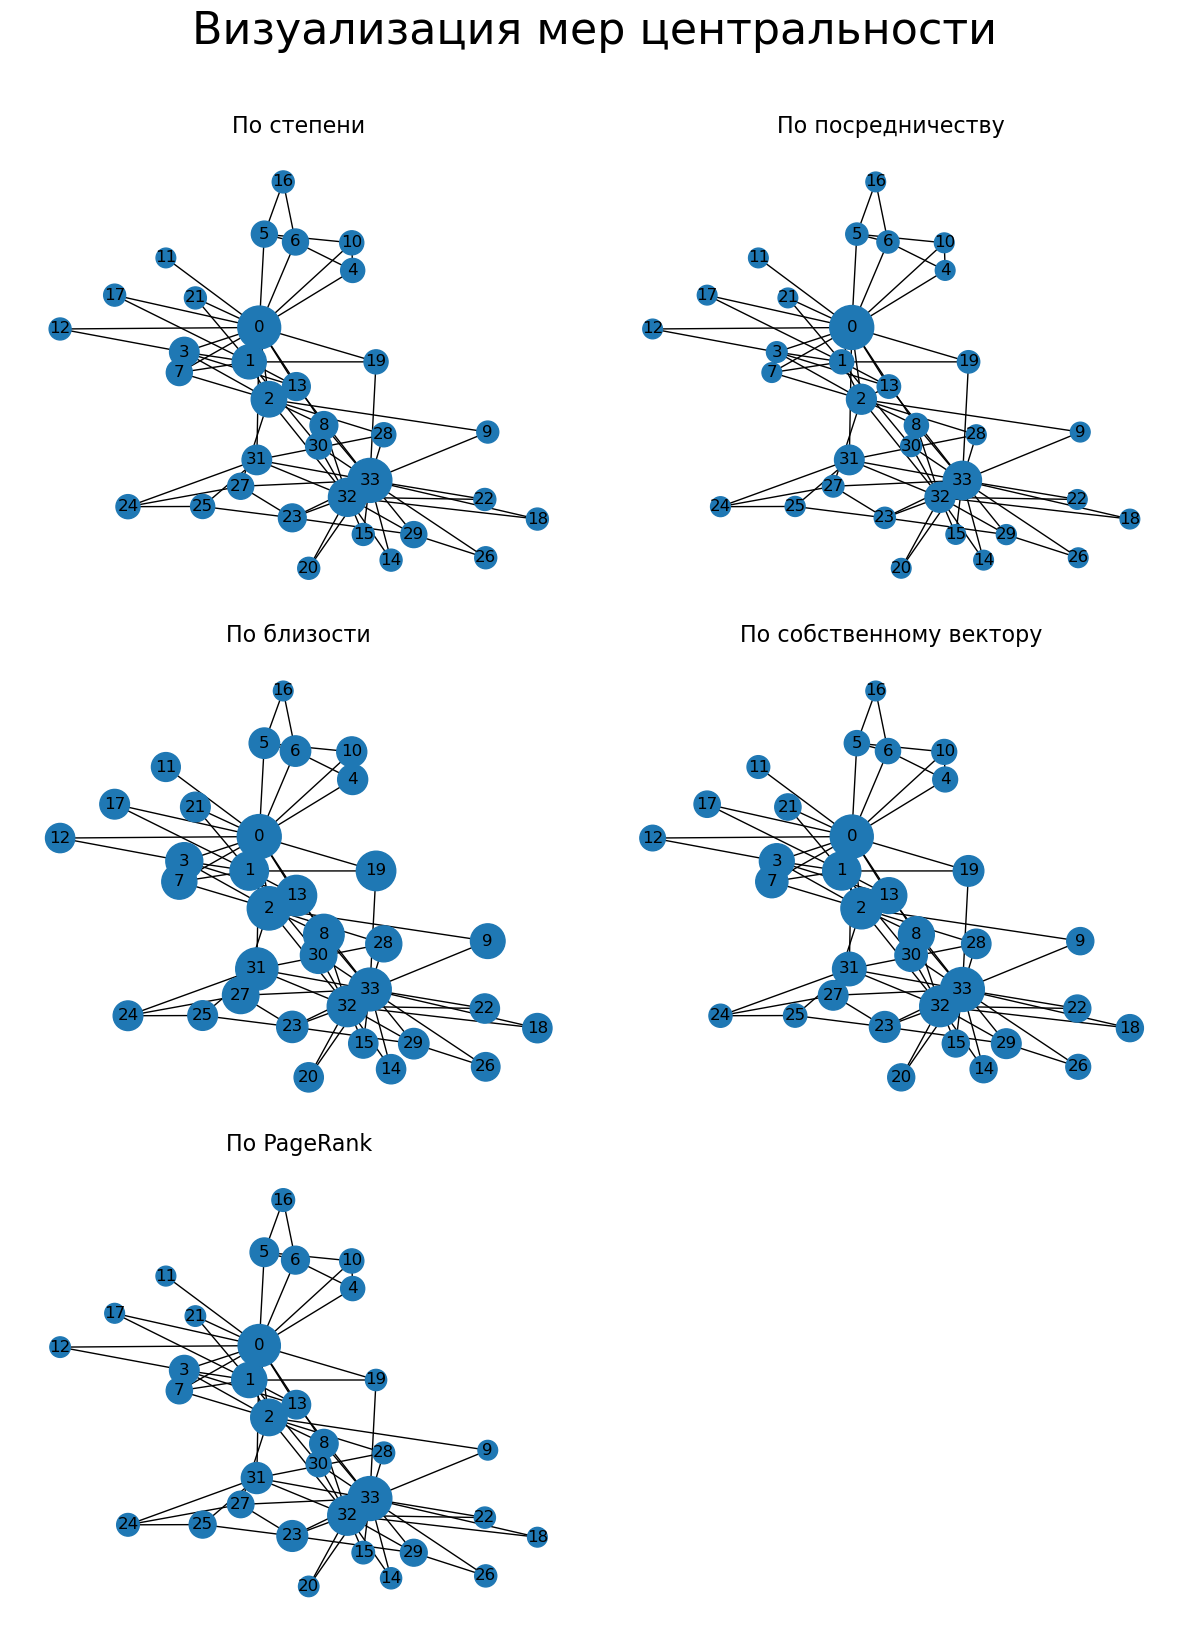

In [12]:
G = nx.karate_club_graph()

centrs = {
    'По степени': nx.degree_centrality(G),
    'По посредничеству': nx.betweenness_centrality(G),
    'По близости': nx.closeness_centrality(G),
    'По собственному вектору': nx.eigenvector_centrality(G),
    'По PageRank': nx.pagerank(G)
}

pos = nx.spring_layout(G, seed=0)

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

for i, (name, c) in enumerate(centrs.items()):
    values = np.array(list(c.values()))
    norm_values = (values - values.min()) / (values.max() - values.min())
    node_sizes =  norm_values * (1000 - 200) + 200
    axes[i].set_title(name, fontsize=16)
    nx.draw_networkx(G, pos=pos, node_size=node_sizes, ax=axes[i])
    axes[i].axis('off')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Визуализация мер центральности', fontsize=32, y=1.02)
plt.tight_layout()
plt.show()

<p class='task' id='5'></p>

5\. Реализуйте алгоритм PageRank с параметром затухания $\alpha=0.9$.

Загрузите граф карате-клуба и сделайте его ориентированным. Найдите стохастическую матрицу переходов $\mathbf{P}$.

$$\mathbf{P}=\mathbf{D}^{-1}\mathbf{A}$$

Модифицируйте матрицу $\mathbf{P}$:

$$\mathbf{P}' = \alpha \mathbf{P} + (1-\alpha)\frac{1}{n}\mathbf{E}$$
$$\mathbf{M}=(\mathbf{P}')^{\top}$$

где $\mathbf{E}$ - матрица размера `NxN`, состоящая из единиц.

Получите вектор $\mathbf{p}^\infty = \mathbf{pr}^{iter}$, используя итеративную процедуру

$$\mathbf{p}^{t+1}=\mathbf{M}\mathbf{p}^t$$

Процесс заканчивается, когда $||\mathbf{p}^{t+1} - \mathbf{p}^{t}|| < \epsilon $

Выведите полученный вектор стационарного состояния на экран.
Вызовите `nx.pagerank` с соответствующими параметрами и докажите, что полученные векторы совпадают.

- [ ] Проверено на семинаре

In [45]:
DG = nx.DiGraph()
DG.add_edges_from(nx.karate_club_graph().edges())
A = nx.adjacency_matrix(DG).toarray()

P = np.divide(A, r:=A.sum(axis=1, keepdims=True), where=r != 0)

for i in range(n:=len(P)):
    if np.allclose(P[i], np.zeros(n)):
        P[i] = np.ones(n) / n
P

array([[0.    , 0.0625, 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.5   , 0.    , 0.    ]])

In [46]:
alpha = 0.9
M = ((alpha * P + (1 - alpha) * np.ones((n:=len(DG), n)) / n)).T
M

array([[0.00294118, 0.00294118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.00294118],
       [0.05919118, 0.00294118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.00294118],
       [0.05919118, 0.11544118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.00294118],
       ...,
       [0.00294118, 0.00294118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.45294118],
       [0.00294118, 0.00294118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.00294118],
       [0.00294118, 0.00294118, 0.00294118, ..., 0.00294118, 0.00294118,
        0.00294118]])

In [49]:
p_0 = np.ones(n) / n
p_t = p_0
p_t_1 = M @ p_t
while np.linalg.norm(p_t_1 - p_t) > 1e-10:
    p_t = p_t_1
    p_t_1 = M @ p_t

p_t_1

array([0.01447605, 0.01529033, 0.01701049, 0.01892417, 0.01529033,
       0.01529033, 0.02675808, 0.02460143, 0.01720401, 0.02675808,
       0.01529033, 0.02096758, 0.02460143, 0.01701049, 0.01701049,
       0.01701049, 0.04629063, 0.02135742, 0.01638973, 0.02333824,
       0.01638973, 0.09778755, 0.04314542, 0.27097818, 0.01447605,
       0.01447605, 0.01447605, 0.01447605, 0.01447605, 0.01447605,
       0.02142456, 0.02359597, 0.01447605, 0.01447605])

In [54]:
pagerank = np.array(list(nx.pagerank(DG, alpha=alpha, tol=1e-10).values()))
np.allclose(p_t_1, pagerank)

True

<p class='task' id='6Ъ'></p>

6\. Вычислите коэффициенты PageRank при помощи задачи нахождения собственного вектора матрицы $\mathbf{M}$ $\mathbf{pr}^{eig}$, соответствующего собственному числу 1.

Покажите, что $\mathbf{pr}^{eig}$ и $\mathbf{pr}^{iter}$ оба являются с.в. матрицы $\mathbf{M}$.

- [ ] Проверено на семинаре

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(M)

i = np.argmin(np.abs(eig_vals - 1))

0

In [64]:
pr_eig = np.real(eig_vecs[:, i])

pr_eig = pr_eig / np.sum(pr_eig)
pr_eig

array([0.01447605, 0.01529033, 0.01701049, 0.01892417, 0.01529033,
       0.01529033, 0.02675808, 0.02460143, 0.01720401, 0.02675808,
       0.01529033, 0.02096758, 0.02460143, 0.01701049, 0.01701049,
       0.01701049, 0.04629063, 0.02135742, 0.01638973, 0.02333824,
       0.01638973, 0.09778755, 0.04314542, 0.27097818, 0.01447605,
       0.01447605, 0.01447605, 0.01447605, 0.01447605, 0.01447605,
       0.02142456, 0.02359597, 0.01447605, 0.01447605])

In [68]:
np.allclose(M @ p_t_1, p_t_1), np.allclose(M @ pr_eig, pr_eig)

(True, True)